In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

fname = 'MOP02J-20150101-L2V17.8.3.he5'
# note this file was downloaded from ftp://l5ftl01.larc.nasa.gov/MOPITT/MOP02J.007/2015.01.01/
# need to get mores!

# users guide:
# https://www2.acom.ucar.edu/sites/default/files/mopitt/v7_users_guide_201609.pdf

filename = fname
f = h5py.File(filename, 'r')

In [5]:
data = f['HDFEOS/SWATHS/MOP02/Data Fields']
locdata = f['HDFEOS/SWATHS/MOP02/Geolocation Fields']

In [8]:
for name in data:
    print(name)

for name in locdata:
    print(name)

APrioriCOMixingRatioProfile
APrioriCOSurfaceMixingRatio
APrioriCOTotalColumn
APrioriSurfaceEmissivity
APrioriSurfaceTemperature
AveragingKernelRowSums
CloudDescription
DEMAltitude
DailyGainDev
DegreesofFreedomforSignal
DryAirColumn
Level1RadiancesandErrors
MODISCloudDiagnostics
MeasurementErrorCovarianceMatrix
PressureGrid
RetrievalAnomalyDiagnostic
RetrievalAveragingKernelMatrix
RetrievalErrorCovarianceMatrix
RetrievalIterations
RetrievedCOMixingRatioProfile
RetrievedCOSurfaceMixingRatio
RetrievedCOTotalColumn
RetrievedCOTotalColumnDiagnostics
RetrievedSurfaceEmissivity
RetrievedSurfaceTemperature
SatelliteZenithAngle
SignalChi2
SmoothingErrorCovarianceMatrix
SolarZenithAngle
SurfaceIndex
SurfacePressure
SwathIndex
TotalColumnAveragingKernel
TotalColumnAveragingKernelDimless
WaterVaporColumn
Latitude
Longitude
Pressure
Pressure2
SecondsinDay
Time


In [9]:
CO = data['RetrievedCOTotalColumn'][()] # mol/cm2
DryAir = data['DryAirColumn'][()] #mol/cm2

#dimension info:
lat = locdata['Latitude'][()]
lon = locdata['Longitude'][()]
time = locdata['Time'][()]

In [10]:
# time is "TAI Time of the observation" 
time[0]

694224025.59799993

In [11]:
np.shape(CO)

(223637, 2)

In [12]:
np.shape(DryAir)

(223637,)

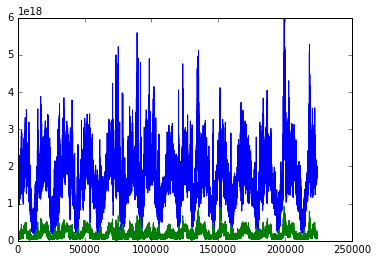

In [13]:
plt.plot(CO)

In [14]:
CO_ppb = 1e9 * CO[:,0] / DryAir

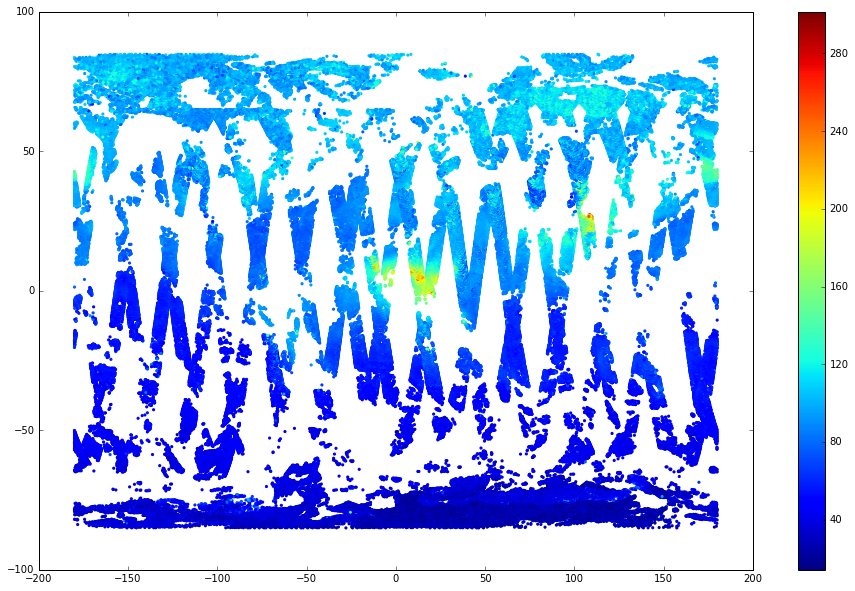

In [15]:
plt.scatter(lon, lat, 10, CO_ppb, edgecolors='none')
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.colorbar()